**Importing all the libraries required for data manipulation, association rule mining, and visualization:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import Image, display
import random

# Grocery Store Market Basket Analysis
**Optimizing Product Placement and Cross-Selling Strategies**

This project aims to assist a grocery store in optimizing product placement and enhancing cross-selling strategies through Market Basket Analysis. By analyzing customer purchasing patterns, we identify frequently purchased product combinations and discover valuable insights into customer behavior.

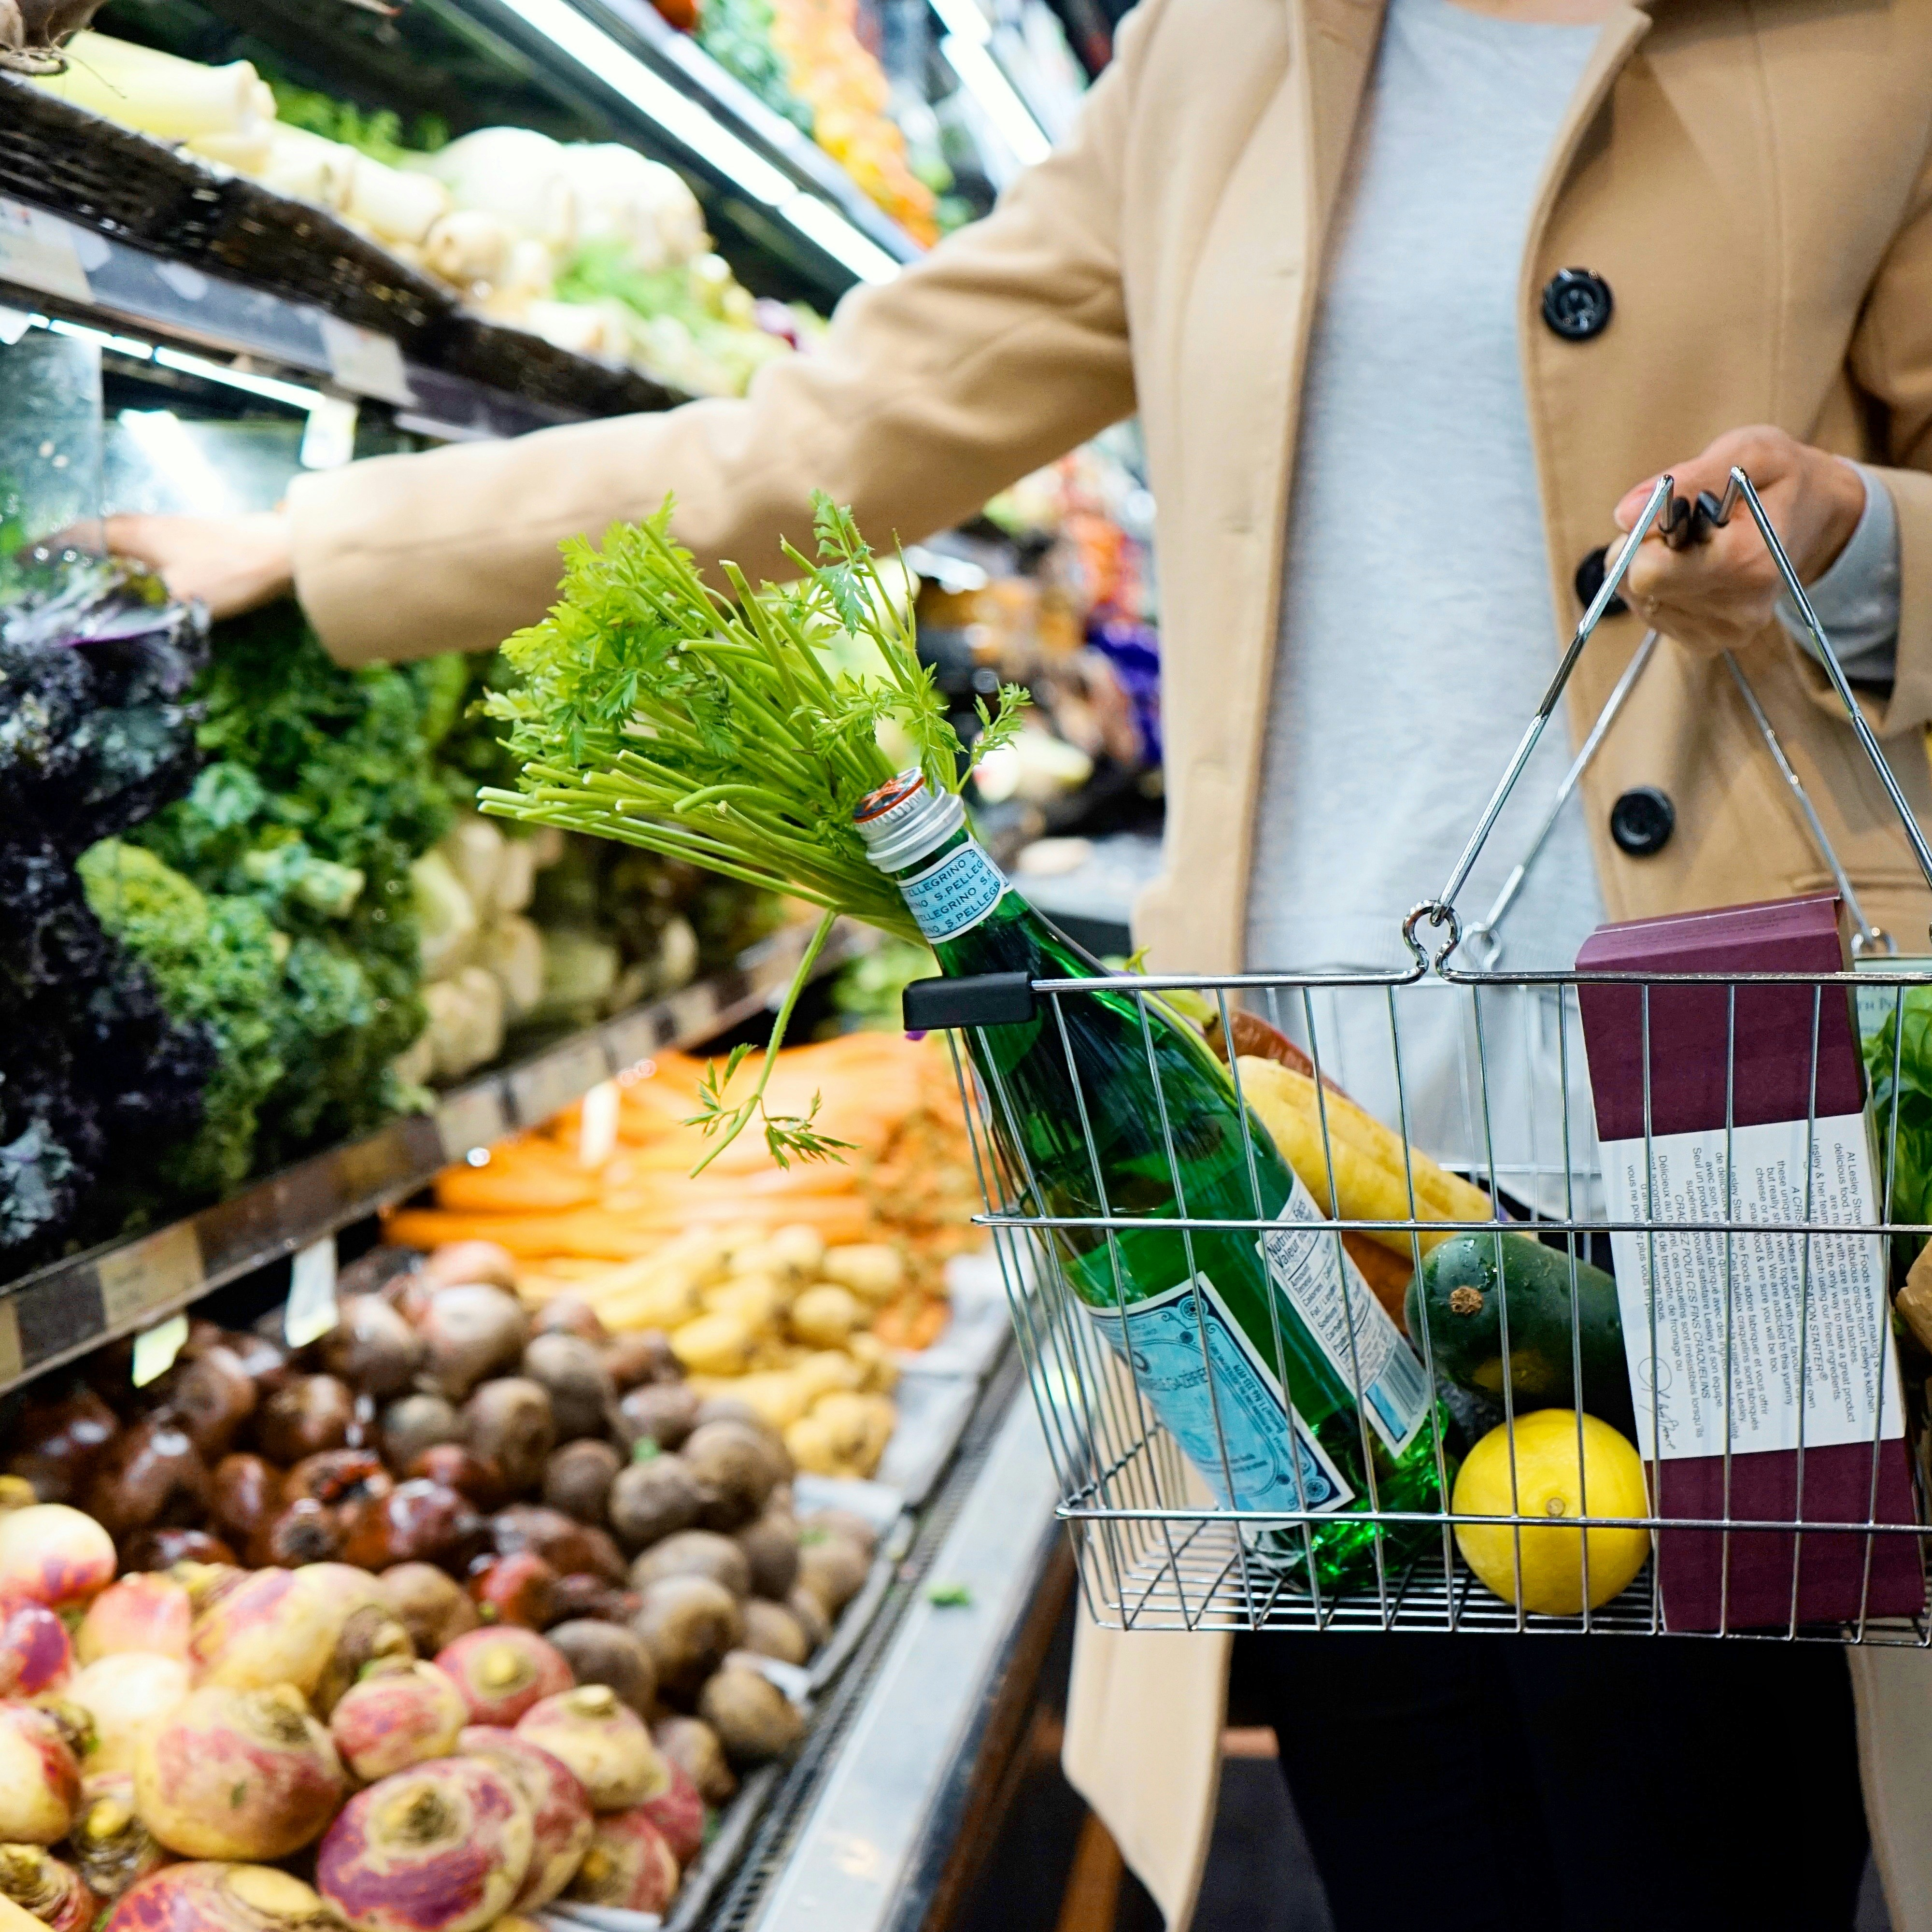

In [2]:
# Display a local image
display(Image(filename='groceries_pic.jpg',width=300, height=300))

## Business Objective

Grocery stores often deal with thousands of products across various categories, which presents a challenge when trying to optimize both the customer shopping experience and revenue generation. By analyzing customer purchasing patterns, stores can significantly improve operations in key areas:

- **Optimizing Product Placement**: Grouping frequently bought-together items to increase the ease of shopping and boost sales. Proper placement encourages customers to discover and purchase complementary items.
- **Enhancing Cross-Selling Opportunities**: Identifying products that customers are likely to purchase together enables the store to create strategic promotions or bundle offers, increasing the size of each transaction.
- **Implementing Dynamic Pricing Strategies**: By leveraging dynamic pricing, stores can optimize revenue by adjusting prices based on demand. For instance, bundle discounts can be offered for frequently purchased product combinations, while prices can be raised for high-demand items during peak shopping periods.
- **Improving Customer Satisfaction**: Making shopping more convenient by offering related products in close proximity and introducing personalized pricing strategies that reward loyal customers can enhance the overall shopping experience.

Through the combined use of Market Basket Analysis and Dynamic Pricing, grocery stores can not only boost sales and profitability but also improve the overall shopping journey, leading to increased customer loyalty and long-term growth.


## Tools & Techniques

- **Data Analysis**: Pandas, NumPy
- **Machine Learning**: Apriori Algorithm for Association Rule Mining
- **Data Visualization**: Matplotlib
- **Programming Language**: Python

## Project Workflow

### 1. Data Collection & Preprocessing

The data consists of transactional records from a grocery store, with each transaction recording the date, customer ID, and items purchased.

**Steps Taken**:

- **Data Cleaning**: Removed duplicate transactions and handled missing values.
- **Basket Creation**: Grouped transactions by customer and date to form "baskets" of products bought together.


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Groceries_dataset.csv')

#Displaying the Dataset
data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [4]:
# Data Cleaning
cleaned_data = data.drop_duplicates()

# Group transactions by customer and date
basket_data = cleaned_data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# Convert the basket data into a one-hot encoded format
# Step 1: Explode the 'itemDescription' column to have each product on a separate row
exploded_basket = basket_data.explode('itemDescription')

# Step 2: Create a crosstab (pivot table) to transform the exploded data into a one-hot encoded matrix
basket_encoded = pd.crosstab(exploded_basket['Member_number'], exploded_basket['itemDescription'])

# Step 3: Convert any value greater than or equal to 1 to 1 (binary encoding) using map
basket_encoded = basket_encoded.apply(lambda x: x.map(lambda x: 1 if x >= 1 else 0))

# Display the one-hot encoded data
basket_encoded.head()

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1000                            0               0     0              0   
1001                            0               0     0              0   
1002                            0               0     0              0   
1003                            0               0     0              0   
1004                            0               0     0              0   

itemDescription  bathroom cleaner  beef  berries  ...  turkey  vinegar  \
Member_number                                     ...                    
1000                            0     0        0  ...       0        0   
1001                            0     1        0  ...       0        0   
1002                            0     0        0  ...       0        0   
1003                            0     0        0  ...       0        0   
1004                            0     0        0  ...       0        0   

itemDescription  waffles  whipped/sour cream  whisky  white bread  white wine  \
Member_number                                                                   
1000                   0                   0       0            0           0   
1001                   0                   1       0            1           0   
1002                   0                   0       0            0           0   
1003                   0                   0       0            0           0   
1004                   0                   0       0            0           0   

itemDescription  whole milk  yogurt  zwieback  
Member_number                                  
1000                      1       1         0  
1001                      1       0         0  
1002                      1       0         0  
1003                      0       0         0  
1004                      1       0         0  

[5 rows x 167 columns]

---

### 2. Exploratory Data Analysis (EDA)

We performed EDA to identify general trends and patterns in the data.

**Most Frequently Purchased Products**:

- Products like whole milk, other vegetables, rolls/buns, and soda are the most frequently purchased.

**Top 10 Products**:

- Helps the grocery store ensure these items are always well-stocked and in prominent locations.


C:\Users\hppat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hppat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\hppat\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


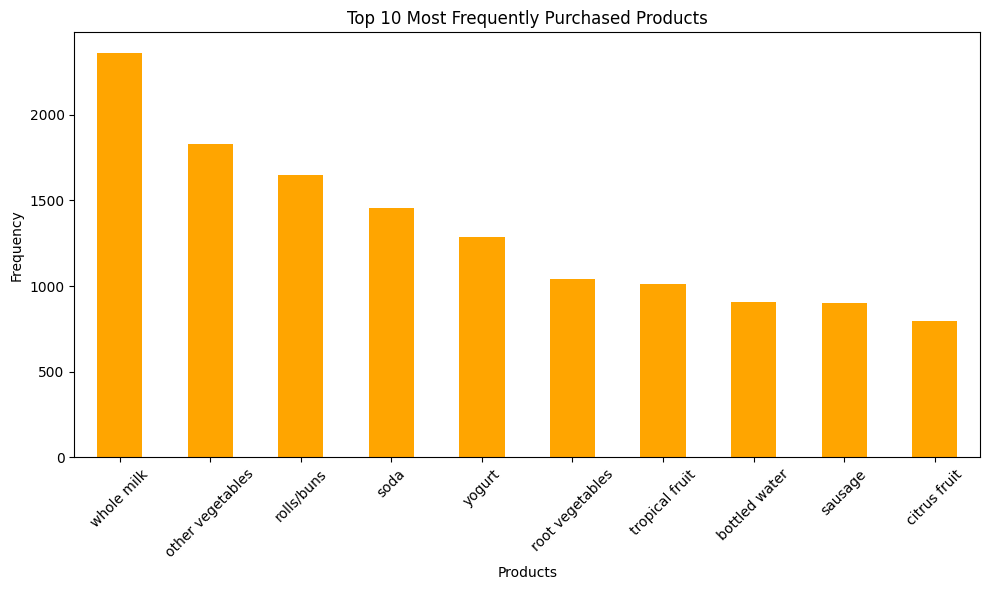

In [5]:
#Exploratory Data Analysis (EDA) - Top 10 products
product_frequency = cleaned_data['itemDescription'].value_counts().head(10)
plt.figure(figsize=(10,6))
product_frequency.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### 3. Market Basket Analysis (Association Rule Mining)

Using the Apriori Algorithm, we conducted Market Basket Analysis to discover associations between products frequently bought together.

**Key Findings**:

- **High Confidence Rules**: For example, customers who buy whole milk are likely to also buy rolls/buns and soda.
- **Cross-Selling Opportunities**: Recommended placing yogurt near root vegetables and promoting combinations like sausage with bottled water.


In [6]:
# Apply the Apriori algorithm for Market Basket Analysis
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to find frequent itemsets with minimum support of 0.01 (1% of transactions)
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets.head())

C:\Users\hppat\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)


---

In [16]:
# Generate association rules with a minimum confidence of 0.2 (20%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the top 10 rules sorted by confidence
top_rules = rules.sort_values('confidence', ascending=False).head(10)
print(top_rules)

                                            antecedents   consequents  \
2644                              (meat, domestic eggs)  (whole milk)   
2159                 (chocolate, fruit/vegetable juice)  (whole milk)   
5800  (rolls/buns, bottled water, other vegetables, ...  (whole milk)   
4460                 (pip fruit, bottled water, yogurt)  (whole milk)   
4590                  (rolls/buns, brown bread, yogurt)  (whole milk)   
4278     (other vegetables, bottled water, brown bread)  (whole milk)   
4268                 (rolls/buns, bottled beer, yogurt)  (whole milk)   
4905                               (curd, soda, yogurt)  (whole milk)   
5825  (rolls/buns, other vegetables, shopping bags, ...  (whole milk)   
4935               (rolls/buns, sausage, domestic eggs)  (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
2644            0.013084            0.458184  0.010262    0.784314  1.711789   
2159            0.014366            

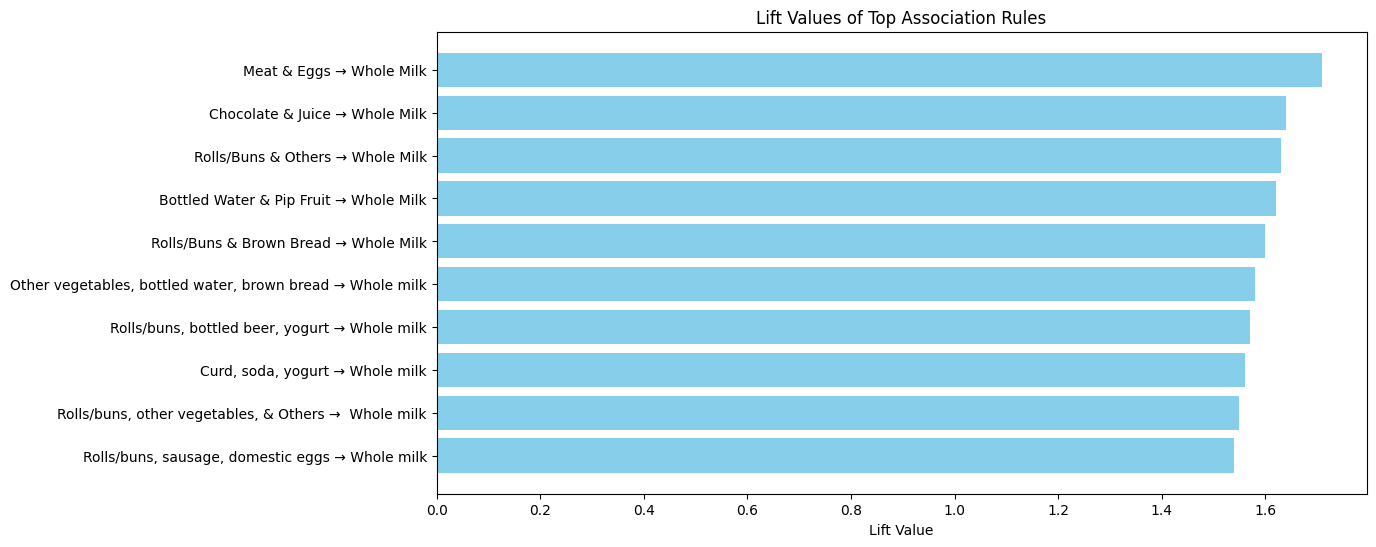

In [25]:
rules = [
    ('Meat & Eggs → Whole Milk', 1.71),
    ('Chocolate & Juice → Whole Milk', 1.64),
    ('Rolls/Buns & Others → Whole Milk', 1.63),
    ('Bottled Water & Pip Fruit → Whole Milk', 1.62),
    ('Rolls/Buns & Brown Bread → Whole Milk', 1.60),
    ('Other vegetables, bottled water, brown bread → Whole milk', 1.58),   
    ('Rolls/buns, bottled beer, yogurt → Whole milk', 1.57),   
    ('Curd, soda, yogurt → Whole milk', 1.56),   
    ('Rolls/buns, other vegetables, & Others →  Whole milk',1.55),   
    ('Rolls/buns, sausage, domestic eggs → Whole milk',1.54) 
]

items, lift_values = zip(*rules)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(items, lift_values, color='skyblue')
plt.xlabel('Lift Value')
plt.title('Lift Values of Top Association Rules')
plt.gca().invert_yaxis()  # Highest lift on top
plt.show()


---

### 4. Association Rule Example

**Rule**: Customers who buy root vegetables are likely to buy other vegetables as well.

- **Support**: 5% of total transactions
- **Confidence**: 45%
- **Lift**: 3.5

This suggests placing root vegetables near other vegetables and offering bundled discounts.

---


### 5. Dynamic Pricing Analysis Based on Market Basket Combinations

**Objective**: This analysis aims to optimize product pricing strategies based on the associations between frequently bought-together products. The goal is to simulate bundle pricing and dynamic price increases during high demand, helping retailers maximize revenue while improving customer satisfaction.

We will:
1. Identify high-confidence product associations using Market Basket Analysis.
2. Simulate bundle pricing and price increases for high-demand periods.
3. Evaluate the impact of these pricing strategies on revenue.
4. Recommend the best pricing strategies based on profitability.


In [18]:
# Function to simulate dynamic pricing for product combinations
def dynamic_pricing(rule):
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    
    current_prices = {product: random.uniform(1, 10) for product in antecedents + consequents}
    
    # Bundle discount (5% to 20%)
    discount = random.uniform(0.05, 0.2)
    bundle_price = sum(current_prices.values()) * (1 - discount)
    
    # High demand price increase (5% to 10%)
    demand_increase = random.uniform(0.05, 0.1)
    high_demand_price = sum(current_prices.values()) * (1 + demand_increase)
    
    return {
        'Products': antecedents + consequents,
        'Original Price': sum(current_prices.values()),
        'Bundle Price (Discount)': bundle_price,
        'High Demand Price': high_demand_price
    }

# Apply dynamic pricing to top 10 high-confidence rules
pricing_strategies = top_rules.apply(dynamic_pricing, axis=1)
pricing_df = pd.DataFrame(pricing_strategies.tolist())

# Display pricing strategies
pricing_df[['Products', 'Original Price', 'Bundle Price (Discount)', 'High Demand Price']]


Products  Original Price  \
0                  [meat, domestic eggs, whole milk]       14.930866   
1     [chocolate, fruit/vegetable juice, whole milk]       11.330932   
2  [rolls/buns, bottled water, other vegetables, ...       29.037439   
3     [pip fruit, bottled water, yogurt, whole milk]       29.871750   
4      [rolls/buns, brown bread, yogurt, whole milk]       23.419005   
5  [other vegetables, bottled water, brown bread,...       21.501186   
6     [rolls/buns, bottled beer, yogurt, whole milk]       25.171415   
7                   [curd, soda, yogurt, whole milk]       15.969463   
8  [rolls/buns, other vegetables, shopping bags, ...       24.617756   
9   [rolls/buns, sausage, domestic eggs, whole milk]       22.975558   

   Bundle Price (Discount)  High Demand Price  
0                13.819697          16.258595  
1                 9.658957          12.039558  
2                23.240794          31.221259  
3                23.951123          31.418043  
4                21.178036          25.339125  
5                20.308964          23.197161  
6                23.025825          26.772353  
7                14.771534          17.131905  
8                22.136714          26.431998  
9                20.780161          24.953289

#### Simulated Dynamic Pricing for Product Combinations

The table below shows the simulated pricing strategies for frequently bought-together products. For each product combination, we show the:
- **Original Price**: Price without any dynamic adjustment.
- **Bundle Price (Discount)**: Discount applied when customers buy the products together.
- **High Demand Price**: Price increase when demand is high for these products.


In [19]:
# Print the column names of the pricing_df DataFrame to check for typos
print(pricing_df.columns)


Index(['Products', 'Original Price', 'Bundle Price (Discount)',
       'High Demand Price'],
      dtype='object')


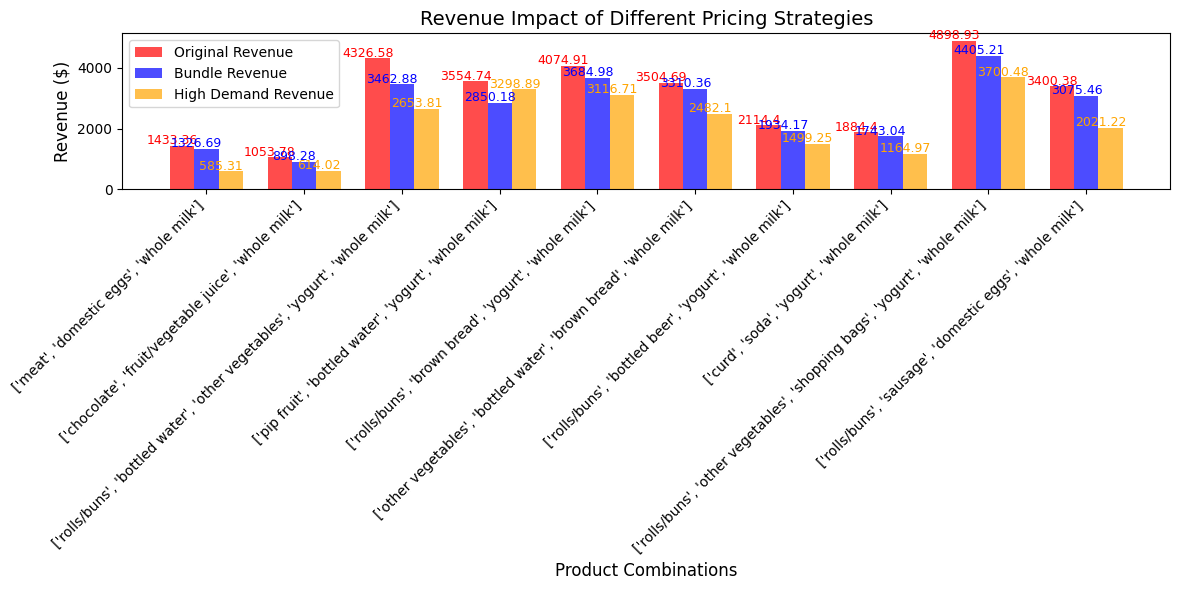

In [28]:
# Simulate demand for bundles and high-demand scenarios
pricing_df['Bundle Demand'] = [random.randint(50, 200) for _ in range(len(pricing_df))]
pricing_df['High Demand Sales'] = [random.randint(30, 150) for _ in range(len(pricing_df))]

# Calculate revenue for different strategies
pricing_df['Revenue (Original)'] = pricing_df['Original Price'] * pricing_df['Bundle Demand']
pricing_df['Revenue (Bundle)'] = pricing_df['Bundle Price (Discount)'] * pricing_df['Bundle Demand']
pricing_df['Revenue (High Demand)'] = pricing_df['High Demand Price'] * pricing_df['High Demand Sales']

# Define the figure size to avoid overlapping labels
plt.figure(figsize=(12, 6))

# Plot the bar chart with improved aesthetics
bar_width = 0.25
index = range(len(pricing_df))

# Plot each revenue category with some spacing between bars
plt.bar(index, pricing_df['Revenue (Original)'], bar_width, label='Original Revenue', color='red', alpha=0.7)
plt.bar([i + bar_width for i in index], pricing_df['Revenue (Bundle)'], bar_width, label='Bundle Revenue', color='blue', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], pricing_df['Revenue (High Demand)'], bar_width, label='High Demand Revenue', color='orange', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks([i + bar_width for i in index], pricing_df['Products'], rotation=45, ha='right')

# Add labels, title, and legend
plt.title('Revenue Impact of Different Pricing Strategies', fontsize=14)
plt.xlabel('Product Combinations', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend()

# Add value labels on top of the bars for clarity
for i in range(len(pricing_df)):
    plt.text(i - 0.1, pricing_df['Revenue (Original)'][i] + 50, round(pricing_df['Revenue (Original)'][i], 2), color='red', ha='center', fontsize=9)
    plt.text(i + bar_width - 0.1, pricing_df['Revenue (Bundle)'][i] + 50, round(pricing_df['Revenue (Bundle)'][i], 2), color='blue', ha='center', fontsize=9)
    plt.text(i + 2 * bar_width - 0.1, pricing_df['Revenue (High Demand)'][i] + 50, round(pricing_df['Revenue (High Demand)'][i], 2), color='orange', ha='center', fontsize=9)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Display the chart
plt.show()


#### Revenue Comparison

The chart below shows the revenue generated under three different pricing strategies:
1. **Original Pricing**: Revenue from selling the products without any price adjustment.
2. **Bundle Pricing**: Revenue from applying a discount to the bundle of products.
3. **High Demand Pricing**: Revenue from increasing prices during periods of high demand.

This helps us understand which pricing strategy is more profitable for each product combination.


In [29]:
# Recommend the best strategy based on higher revenue
def recommend_pricing_strategy(row):
    if row['Revenue (Bundle)'] > row['Revenue (High Demand)']:
        return 'Bundle Discount'
    else:
        return 'High Demand Price Increase'

# Apply recommendations
pricing_df['Recommended Strategy'] = pricing_df.apply(recommend_pricing_strategy, axis=1)

# Display the final recommendation
pricing_df[['Products', 'Recommended Strategy']]


Products  \
0                  [meat, domestic eggs, whole milk]   
1     [chocolate, fruit/vegetable juice, whole milk]   
2  [rolls/buns, bottled water, other vegetables, ...   
3     [pip fruit, bottled water, yogurt, whole milk]   
4      [rolls/buns, brown bread, yogurt, whole milk]   
5  [other vegetables, bottled water, brown bread,...   
6     [rolls/buns, bottled beer, yogurt, whole milk]   
7                   [curd, soda, yogurt, whole milk]   
8  [rolls/buns, other vegetables, shopping bags, ...   
9   [rolls/buns, sausage, domestic eggs, whole milk]   

         Recommended Strategy  
0             Bundle Discount  
1             Bundle Discount  
2             Bundle Discount  
3  High Demand Price Increase  
4             Bundle Discount  
5             Bundle Discount  
6             Bundle Discount  
7             Bundle Discount  
8             Bundle Discount  
9             Bundle Discount


#### Pricing Strategy Recommendations

Based on the revenue analysis, we recommend the most profitable pricing strategy for each product combination. This recommendation will help the retailer implement dynamic pricing based on real-time demand or promote bundles to increase sales.

---

## **Recommendations**

Based on our **market basket analysis** and **pricing simulation**, we propose the following strategies to optimize **product placement**, **pricing**, cross-selling opportunities, and overall business outcomes.

---

### *1. Product Placement Strategy*

- **Adjacency**: Items frequently bought together, such as **whole milk** and **yogurt**, should be placed in close proximity. This layout will encourage customers to purchase these complementary products, increasing basket sizes.

- **Flow**: Arrange the store layout to guide customers sequentially through these high-association products. For example, starting with **rolls/buns** leading to **sausage** and ending with **yogurt**. This increases exposure to multiple high-demand items, enhancing the likelihood of additional purchases.

---

### *2. Promotional Activities*

- **Bundles**: Create **bundle deals** where complementary products are discounted when bought together. For example, offer discounts on combinations like **whole milk, yogurt, and rolls**. This will incentivize customers to add more items to their cart.

- **Cross-Merchandising**: Set up **in-store promotional displays** for associated items. For instance, place **bottled water** near **whole milk** and **sausage** near **rolls/buns** to boost sales of both products.

---

### *3. Inventory Management*

- **Stock Levels**: Based on demand patterns identified from the analysis, ensure that frequently associated items like **whole milk**, **yogurt**, and **other vegetables** are always adequately stocked to prevent lost sales.

- **Reordering Systems**: Implement real-time **reordering alerts** for these high-demand products to avoid stockouts and ensure that customers can always find their preferred combinations.

---

### *4. Marketing Communications*

- **Targeted Advertising**: Utilize insights from the analysis to create **advertising campaigns** targeting customer segments that are likely to buy certain product combinations. For example, if customers often purchase **rolls/buns with yogurt**, create advertisements or promotions targeting these product groups, both online and in-store.

- **Personalized Offers**: Leverage customer data from loyalty programs to offer **personalized deals**. For example, offer returning customers discounts on products they frequently purchase together, encouraging repeat purchases and enhancing customer loyalty.

---

### *5. Customer Experience Enhancement*

- **Convenience**: Simplify the shopping experience by **grouping related items together**, making it easier for customers to find and purchase complementary products. For example, place frequently paired items like **rolls/buns** and **brown bread** near each other.

- **Engagement**: Use **signage** or **digital touchpoints** to highlight product associations. For example, include recommendations for complementary products at self-checkout kiosks or via store apps, prompting customers to add more items to their baskets.


---

# Conclusion

By analyzing these association rules, we gain valuable insights into customer purchasing patterns. The strong associations between specific item combinations and whole milk highlight opportunities for:

- **Sales Growth**: Through strategic product placement and promotions, we can encourage higher basket values.

- **Customer Satisfaction**: Enhancing the shopping experience by making it easier for customers to find and purchase related items.

- **Dynamic Pricing**: Implementing dynamic pricing strategies based on customer purchasing behavior and demand patterns allows the store to optimize revenue. Offering bundle discounts for frequently bought-together products or adjusting prices during high-demand periods can significantly boost profitability while maintaining customer satisfaction.

- **Competitive Advantage**: Utilizing data-driven insights to differentiate the grocery store from competitors. By leveraging association rules and dynamic pricing, the store can create personalized promotions, resulting in increased customer loyalty and repeat purchases.

Implementing these recommendations based on the detailed understanding of the **associations** along with **dynamic pricing** can lead to **increased sales**, better **inventory turnover**, and improved **customer loyalty**.

---


## References

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [mlxtend Documentation](http://rasbt.github.io/mlxtend/)
- [Apriori Algorithm Explanation](https://en.wikipedia.org/wiki/Apriori_algorithm)


---

# Acknowledgements

- We would like to express our gratitude to **[Heeral Dedhia](https://www.kaggle.com/heeraldedhia)** for providing the [Groceries Dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) on Kaggle. 
- The Groceries Dataset contains over 9,800 transactions from a grocery store. Each transaction lists the items purchased, allowing for comprehensive analysis of purchasing patterns and associations between products.
- This dataset was instrumental in conducting our Market Basket Analysis for optimizing product placement and cross-selling strategies.

---
